<a href="https://colab.research.google.com/github/karlmanalo/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [0]:
def mean(data):
  data_total = data.sum()
  data_length = len(data)
  mean = data_total / data_length
  return mean

In [0]:
def var(data):
  x_bar = mean(data)
  diffs = data - x_bar
  diffs_sq = diffs**2
  numerator = np.sum(diffs_sq)
  denominator = len(data) - 1
  return numerator / denominator

In [0]:
def std(data):
  std = np.sqrt(var(data))
  return std

In [6]:
mean(sales)

3052.714285714286

In [7]:
# Checking via NumPy

np.mean(sales)

3052.714285714286

In [8]:
var(sales)

214387.90476190473

In [9]:
# Checking via NumPy

np.var(sales, ddof=1)

214387.90476190473

In [10]:
std(sales)

463.0204150595357

In [11]:
# Checking via NumPy

np.std(sales, ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
cust_last_week = [127, 80, 105, 92, 120, 115, 93]

In [13]:
df = pd.DataFrame(list(zip(sales, cust_last_week)), 
                  columns = ['Sales', 'Customers Last Week'])

df.head()

,Sales,Customers Last Week
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [14]:
df.cov()

,Sales,Customers Last Week
Sales,214387.904762,7604.357143
Customers Last Week,7604.357143,290.952381


In [15]:
df.cov().iloc[0][1]

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [16]:
std(np.array(cust_last_week))

17.057326313123664

In [17]:
# Checking via NumPy

np.std(cust_last_week, ddof=1)

17.057326313123664

In [0]:
# Wouldn't be able to generalize this to any two lists.. Come back to this

def corr(data):
  corr = df.cov().iloc[0][1] / (std(sales) * std(np.array(cust_last_week)))
  return corr

In [19]:
corr(sales)

0.9628339778148909

In [20]:
# Using Pandas to check correlation value

df.corr()

,Sales,Customers Last Week
Sales,1.000000,0.962834
Customers Last Week,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [21]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0)
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [22]:
df_titanic_num = df_titanic[['pclass', 'survived', 'age', 'sibsp', 'parch', 
                             'fare', 'boat', 'body',
                             'has_cabin_number']].copy()
df_titanic_num.head()

,pclass,survived,age,sibsp,parch,fare,boat,body,has_cabin_number
1,1.0,1.0,29.0000,0.0,0.0,211.3375,2,NaN,1
2,1.0,1.0,0.9167,1.0,2.0,151.5500,11,NaN,1
3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,NaN,1
4,1.0,0.0,30.0000,1.0,2.0,151.5500,NaN,135.0,1
5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,NaN,1


In [23]:
df_titanic_cat = df_titanic[['name', 'sex', 'ticket', 'cabin', 'embarked', 
                             'boat', 'home.dest']].copy()
df_titanic_cat.head()

,name,sex,ticket,cabin,embarked,boat,home.dest
1,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
2,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
3,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
5,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [24]:
df_titanic_num.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [25]:
df_titanic_num.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

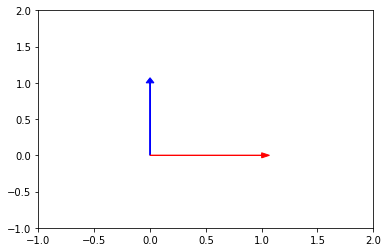

In [26]:
vec1_ortho = [0, 1]
vec2_ortho = [1, 0]

plt.arrow(0, 0, vec1_ortho[0], vec1_ortho[1], head_width=.07, head_length=.07, color='blue')
plt.arrow(0, 0, vec2_ortho[0], vec2_ortho[1], head_width=.07, head_length=.07, color='red')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()

Orthogonal is a synonym for perpendicular.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [27]:
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a,b)

-40

No. These vectors have a dot product of -40, meaning that they are not orthogonal. Orthogonal vectors have a dot product of 0.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [28]:
c = np.array([2, -15, 6, 20])

print("(Norm of c)**2:", np.linalg.norm(c)**2)
print("c dot c:", np.dot(c, c))
print("c Transpose * c:", np.matmul(c.T, c))

(Norm of c)**2: 665.0
c dot c: 665
c Transpose * c: 665


All of these values are equivalent. In terms of pure numbers, for all 3 operations, you are squaring each element and adding all of the results together.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = 7\hat{i} + 12\hat{j}$

$e = 2\hat{i} + 11\hat{j} - 8\hat{k}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = [4, 12, 11, 9, 2]

In [30]:
f_norm = np.linalg.norm(f)
f_norm

19.131126469708992

In [31]:
f_unit_vec = f / f_norm
f_unit_vec

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

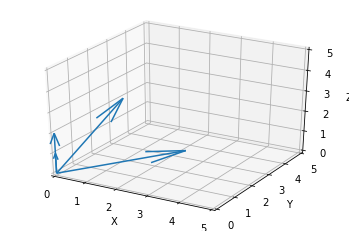

In [32]:
# Had to mess with the bracketing a bit in the "vectors" section to get this to
# work.

from mpl_toolkits.mplot3d import Axes3D

origin = [0, 0, 0]
LD_1 = [0, 0, 1]
LD_2 = [0, 0, 2]
LI_1 = [1, 2, 3]
LI_2 = [3, 2, 1]

vectors = np.array([(origin + LD_1),
                   (origin + LD_2),
                   (origin + LI_1),
                   (origin + LI_2)])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

$\vec{LD_1}$ and $\vec{LD_2}$ are linearly dependent as they lie on the same line (the angle $\theta$ between $\vec{LD_1}$ and $\vec{LD_2}$ is equal to zero).

$\vec{LI_1}$ and $\vec{LI_2}$ are linearly independent as they do not fall on the same line (the angle $\theta$ between $\vec{LI_1}$ and $\vec{LI_2}$ is not equal to zero).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

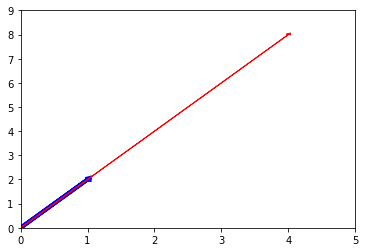

In [33]:
g = [1, 2]
h = [4, 8]

plt.arrow(0, 0, g[0], g[1], linewidth=4, head_width=.07, head_length=0.07, color ='blue')
plt.arrow(0, 0, h[0], h[1], linewidth=1, head_width=.07, head_length=0.07, color ='red')
plt.xlim((0,5))
plt.ylim((0,9))
plt.show()

$\vec{h} = 4\vec{g}$

These vectors are linearly dependent. The span of these two vectors is infinite along line $y = 2x$.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

In [35]:
matrix_lmn = np.concatenate(([l],[m],[n]))
matrix_lmn

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [0]:
# Bracketing has really been throwing me off today. Kept trying to concatenate
# without enclosing each variable in brackets so I kept getting an array that 
# concatenated to the end of the list rather than as a new row :/

In [37]:
np.linalg.matrix_rank(matrix_lmn)

3

This matrix of equations has a rank of 3. This means that all 3 vectors $\vec{l}, \vec{m}, $ and $\vec{n}$ are linearly independent, meaning $\{l, m, n\}$ spans all of 3-dimensional space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



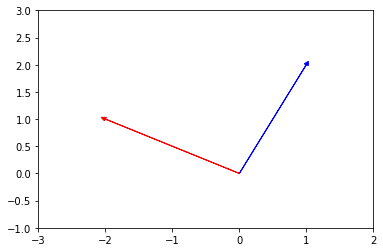

In [38]:
vec1_r2 = [1, 2]
vec2_r2 = [-2, 1]

plt.arrow(0, 0, vec1_r2[0], vec1_r2[1], head_width=.07, head_length=.07, color='blue')
plt.arrow(0, 0, vec2_r2[0], vec2_r2[1], head_width=.07, head_length=.07, color='red')
plt.xlim(-3, 2)
plt.ylim(-1, 3)
plt.show()

Any two vectors where the angle $\theta$ between the two vectors is not zero will form a basis for $\mathbb{R}^2$.

## 6.2 What does it mean to form a basis?

Two vectors form a basis for vector space $V$ when they are linearly independent and span vector space $V$, in this case $\mathbb{R}^2$ (essentially the xy coordinate system).

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
p = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])

In [40]:
np.linalg.matrix_rank(p)

3

The rank of P is 3.

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us how many linearly independent vectors a matrix contains (and by extension, how many linearly dependent/redundant vectors a matrix contains). The rank of a matrix also coincides with how many dimensions in space a matrix of vectors spans.

#Stretch Goal

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v1 = np.array([1, 3])
w1 = np.array([-1, 2])

def proj_vw(v, w):
  numerator = np.dot(w, v) * v
  denominator = np.dot(v, v)
  return numerator / denominator


In [62]:
proj_vw(v1, w1)

array([0.5, 1.5])

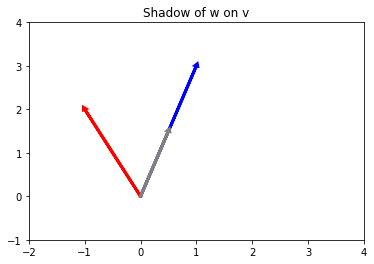

In [63]:
# Set axis limits

plt.xlim(-2,4)          
plt.ylim(-1,4)

# Plot Vectors and proj_vw

plt.arrow(0, 0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=.05, color ='blue')
plt.arrow(0, 0, w1[0], w1[1], linewidth=3, head_width=.05, head_length=.05, color ='red')
plt.arrow(0, 0, proj_vw(v1, w1)[0], proj_vw(v1, w1)[1], linewidth=3, head_width=.05, head_length=.05, color ='gray')

plt.title("Shadow of w on v")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

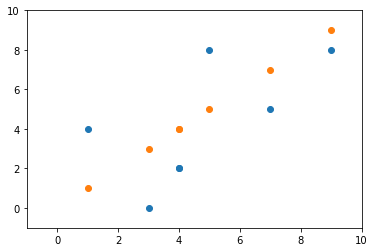

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

plt.xlim(-1,10)          
plt.ylim(-1,10)

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

x_values_v = np.array(x_values)
y_values_v = x_values_v

data_v = {"x": x_values_v, "y": y_values_v}

df_v = pd.DataFrame(data_v)

plt.scatter(df.x, df.y)
plt.scatter(df_v.x, df_v.y)
plt.show()

In [80]:
points = np.array(df)
points

array([[1, 4],
       [4, 2],
       [7, 5],
       [3, 0],
       [9, 8],
       [4, 2],
       [5, 8]])

In [84]:
points_L = np.array(df_v)
points_L

array([[1, 1],
       [4, 4],
       [7, 7],
       [3, 3],
       [9, 9],
       [4, 4],
       [5, 5]])

In [93]:
proj_vw(points_L[0], points[0])

array([2.5, 2.5])

In [121]:
for v, w in zip(points_L, points):
  def proj_vw(v, w):
    numerator = np.dot(w, v) * v
    denominator = np.dot(v, v)
    return numerator / denominator
  print(proj_vw(v, w))

[2.5 2.5]
[3. 3.]
[6. 6.]
[1.5 1.5]
[8.5 8.5]
[3. 3.]
[6.5 6.5]


In [0]:
# Couldn't figure out how to get from these projected vectors to graphing them.
# Specifically how to access the x and y coordinates of these results via a 
# function rather than brute forcing my way to a graph. I know there's probably
# a more efficient way to solve this but I'm blanking so I'm going to turn this
# in without completing this last stretch goal.